<a href="TAIL"><img src="https://i.imgur.com/GRTE0OG.png" width="150" title="Tail Logo" /></a>

# <font color ="#00b8ff">Exercícios de Aprendizagem de Máquina</font>

 Essa lista de exercícios foi criada para que vocês possam aplicar os conhecimentos que vocês adquiriram na aula que assistiram.

Podem tirar dúvidas com **Tales Nobre** e **Felipe Duarte** quando quiserem!
**O prazo de envio do notebook é até a reunião da próxima semana, até 1 hora antes da reunião, podem enviar colocar o conteúdo na branch de vocês do repositório**



🌍 [Link do drive com o Dataset](https://drive.google.com/drive/folders/1xi7m5gzJflujzoDvkPMkRO28SlR4139n?usp=sharing)


###**Objetivos**


*   Entender o nível de conhecimento individual de vocês
*   Estimular vocês a praticarem as formas básicas de avaliar um modelo


##**Observações**



*   Façam uma cópia desse notebook e realizem as questões.
*   Foquem no espaço de *Conclusões*, que aparece no final de cada questão, para explicar as conclusões que vocês chegaram a partir da análise de dados.
*   É recomendável que vocês acessem os materiais de apoio que serão disponibilizados em seguida.
*   Prezem pela organização, é muito importante explicar cada etapa de execução, principalmente no contexto de análise de dados.
*   Claro que vocês não vão precisam importar várias vezes as bibliotecas dentro de um mesmo notebook, mas por fins educativos é recomendado que vocês façam isso nessa lista de exercícios!
*   As questões são progressivas, ou seja, a quantidade de instruções e o nível de dificuldade mudarão ao longo da lista. **Lembre-se de manter o mesmo padrão em todas as questões.**
*  Divida em quantas células e caixas de texto quiser, afim de deixar a legibilidade do código a melhor possível.



🐼 Material de apoio:

Repositório de apoio:
*   [Repositório do Github](https://github.com/talesnobre/miniproject_ML/blob/main/models.py)

Matriz de Confusão:
*   [O que é?](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62)
*   [SKlearn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)


F1 Score (Acurácia, Precisão e Recall):
*   [O que é?](https://medium.com/@mateuspdua/machine-learning-m%C3%A9tricas-de-avalia%C3%A7%C3%A3o-acur%C3%A1cia-precis%C3%A3o-e-recall-d44c72307959)
*   [SKlearn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

Loss Function:
*   [O que é?](https://www.datarobot.com/blog/introduction-to-loss-functions/#:~:text=At%20its%20core%2C%20a%20loss,ll%20output%20a%20lower%20number.)
*   [SKlearn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html)


Lembrem-se, a prática leva à perfeição!🧠

#**Questão 1: Doenças Cardíacas**




Use Acurácia, F1 Score, Matriz de confusão e Loss function para avaliar o desempenho do modelo.

## Dataset (Não precisam mexer)

In [79]:
import time
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE


# evalue measures
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgbm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from catboost import CatBoostClassifier

import seaborn as sns
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

print('Completed.')

Completed.


In [24]:
df = pd.read_csv("C:/Users/Meu Computador/Trainees2/Notebook 4/heart.csv")

In [25]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [26]:
df.dropna(inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [29]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values


In [30]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y) # convert each label in the original dataset to the unique integer
print(y)

[0 0 0 ... 0 0 1]


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=110)

print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('---')
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (190260, 21)
y_train:  (190260,)
---
X_test:  (63420, 21)
y_test:  (63420,)


In [33]:
print("Length of y_true:", len(y_train))
print("Length of y_pred:", len(y_test))

Length of y_true: 190260
Length of y_pred: 63420


## Regresão Logística

In [34]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)



### Avaliação

In [51]:
precision_score(y_test, y_pred) * 100
# de todos os dados classificados como positivos, quantos são realmente positivos
# Pc = TP / (TP + FP)

49.56110735989196

In [52]:
recall_score(y_test, y_pred) * 100
# qual a porcentagem de dados classificados como positivos comparado com a quantidade real de positivos que existem na amostra.
# Recall = TP / (TP + FN)

12.45122985581001

In [53]:
#Acurácia simples
accuracy_score(y_test, y_pred) * 100
# Acc = (Verdadeiros Positivos(TP) + Verdadeiros Negativos(TN)) / (TP + TN + FP + FN) == "Total"
# T = True; F = False

90.68432671081678

In [54]:
#F1-Score
f1_score(y_test, y_pred) * 100
# F1 = 2 * precisão * recall / precisão + recall 
# essa métrica une precisão e recall afim de trazer um número único que determine a qualidade geral do nosso modelo.

19.902386117136658

In [68]:
#Loss Function
sklearn.metrics.log_loss(y_test, y_pred)


3.35770899121577

In [38]:
#Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[56778   747]
 [ 5161   734]]


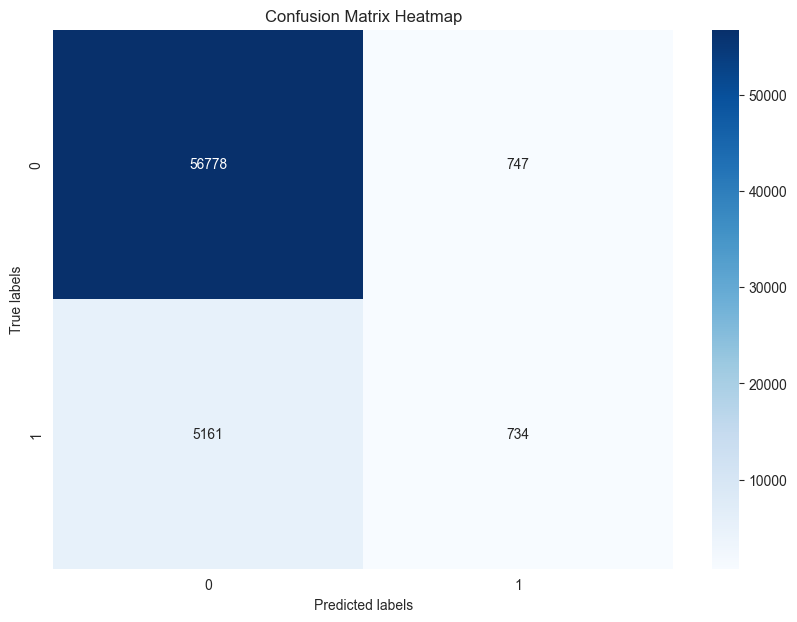

In [69]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [80]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=logistic_model,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    n_jobs=-1  # Use todas as CPUs disponíveis
)

In [81]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

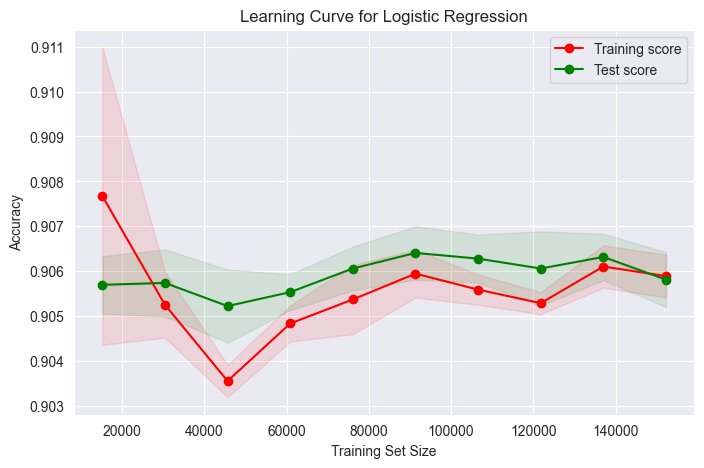

In [83]:
plt.figure(figsize=(8, 5))
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Test score")

plt.title("Learning Curve for Logistic Regression")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()

## Conclusão

In [ ]:
conclusao = """
    Nessa análise, usando Regressão Logística, achei importante colocar mais células para cada tipo de dado que eu poderia me aproveitar, então, além
da accuracy e matriz de correlação, observar o recall e a precisão foram importante. Antes da análise, irei anotar algumas definições que acho
importante para prosseguir:

1. Regressão Logísitca: modelo estatístico, principalmente binário, que atua como uma "função linear"
- é simples para detectar varíaveis binários
- é fácil de entender, pelo menor nível de complexidade.

    Assim, reunindo os dados obtidos temos que:
        - Acurracy = 90.68%
        - Precision = 49.5%
        - Recall = 12.4%
        - F1_score = 20%
        - Loss Function = 3.35

    Analisando esses dados, podemos perceber que a acurácia é bem alta, então podemos dizer que o modelo foi bom para o propósito, dado os dados
existentes. Contudo, como o F1_score é baixo e a Loss Function relativamente alto, pode indicar alguns erros:
    - Analisando o gráfico, o modelo apresenta algumas variações de curva de aprendizado e vai equiparando com o teste, então, muito dificilmente
o modelo está overfitado. A conclusão que eu consegui pensar foi na de *Desbalanceamento dos Dados*, provavelmente o F1 Score está baixo pois o modelo
está de certa forma, "tendecioso" para identificar alguns dados, mas não outros.
"""

print(conclusao)

## Rede Neural

In [92]:
neural_network_model = MLPClassifier()
neural_network_model.fit(X_train, y_train)

y_pred = neural_network_model.predict(X_test)


### Avaliação

In [93]:
precision_score(y_test, y_pred) * 100
# de todos os dados classificados como positivos, quantos são realmente positivos
# Pc = TP / (TP + FP)

55.59400230680508

In [94]:
recall_score(y_test, y_pred) * 100
# qual a porcentagem de dados classificados como positivos comparado com a quantidade real de positivos que existem na amostra.
# Recall = TP / (TP + FN)

8.176420695504664

In [95]:
#Acurácia simples
accuracy_score(y_test, y_pred) * 100
# Acc = (Verdadeiros Positivos(TP) + Verdadeiros Negativos(TN)) / (TP + TN + FP + FN) == "Total"
# T = True; F = False

90.85777357300536

In [96]:
#F1-Score
f1_score(y_test, y_pred) * 100
# F1 = 2 * precisão * recall / precisão + recall 
# essa métrica une precisão e recall afim de trazer um número único que determine a qualidade geral do nosso modelo.

14.256137237503697

In [97]:
#Loss Function
sklearn.metrics.log_loss(y_test, y_pred)

3.2951924053942174

In [98]:
#Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[57140   385]
 [ 5413   482]]


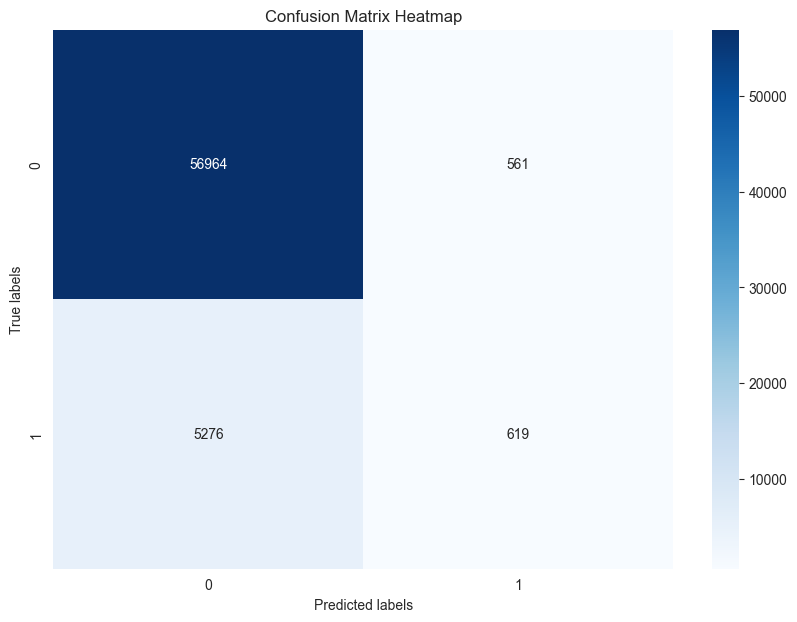

In [77]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [99]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=logistic_model,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    n_jobs=-1  # Use todas as CPUs disponíveis
)

In [100]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

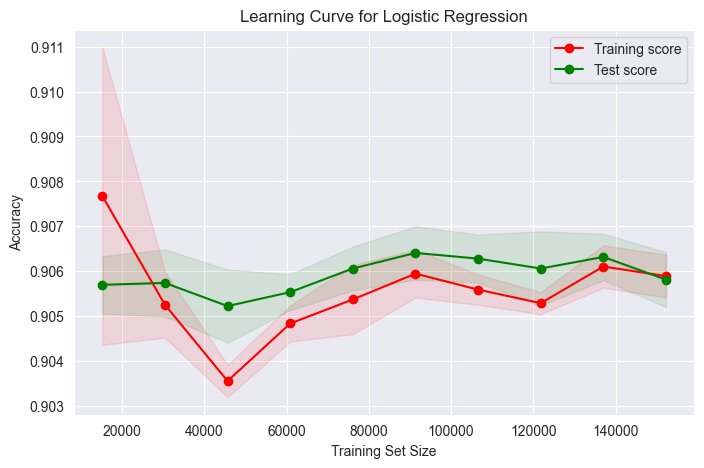

In [101]:
plt.figure(figsize=(8, 5))
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Test score")

plt.title("Learning Curve for Logistic Regression")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()

## Conclusão

In [ ]:
conclusao = """
    Aqui, com o modelo baseado em Rede Neural, da mesma forma que na célula de conclusão anterior, vou anotar uma definição de Rede Neural e os dados
obtidos nas células anteriores.

    Redes Neurais: São baseadas num comportamento de um neurônio animal, onde fão constituindo "sinapses" e interligando com dados até um "output".
Diferente da Regressão logística, não é algo linear, e os resultados são muitas vezes guiados pelos "pesos" de importância da informação obtida. Como
é possível colocar mais dados e interligar com dados diferentes, atende casos mais complexos e gerais.

    Reunindo os dados obtidos, temos que:
        - Acurracy: 90.79%
        - Precision: 55.5%
        - Recall: 8.17%
        - F1 Score: 14.25%
        - Loss Function: 3.29%

    Com esses dados, podemos compara que com o modelo anterior, praticamente toda as métrica são parecidas. Aqui, porém, o F1 score é ainda menor
que o modelo anterior. Logo, olhando apenas para esses números, consigo pensar que há algum problema com os dados, pois mesmo com a acurracy alta,
o F1 Score ser baixo em dois modelos distintos me parece estranho, além da Loss Function alta. Portanto, provalmente o erro está em como os dados estão
organizados, e os modelos de aprendizado se guiam por um "viés".
"""

print(conclusao)

#**Questão 2: Raças de cachorro**




Use Acurácia, F1 Score, Matriz de confusão e Loss function para avaliar o desempenho do modelo.

### Dataset (Não precisam mexer)

In [12]:
df = pd.read_csv("C:/Users/Meu Computador/Trainees2/Notebook 4/dogs.csv")

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("group", axis=1), df["group"], test_size=0.25, random_state=42)



## Nayve Bayes

In [14]:
from sklearn.naive_bayes import GaussianNB #nb normal (sem ser gaussiano)
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

model = GaussianNB()

model.fit(X_train, y_train)
predicted = model.predict(X_test)


### Avaliação

## Multi-Layer Perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=42, max_iter=1000).fit(X_train, y_train)

### Avaliação

## Conclusão

In [ ]:
conclusao = """
escreva sua conclusão aqui
"""

print(conclusao)